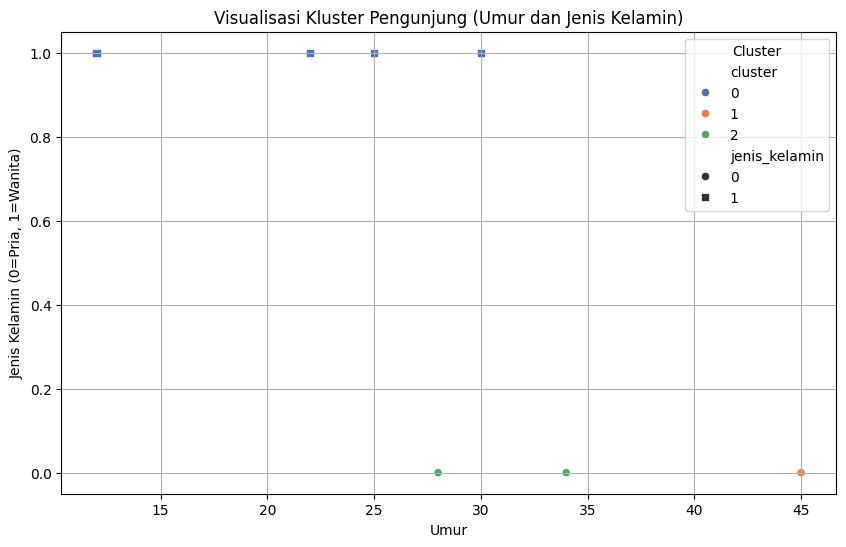

ArgumentError: List argument must consist only of tuples or dictionaries

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Koneksi ke database MySQL menggunakan SQLAlchemy
engine = create_engine('mysql+mysqlconnector://root:@localhost/ulasan')

# Memuat data dari tabel `data_ulasan` ke dalam DataFrame
query = "SELECT * FROM data_ulasan"
df = pd.read_sql(query, engine)

# Pra-pemrosesan
# Mengubah kolom kategorikal menjadi numerik
df['jenis_kelamin'] = df['jenis_kelamin'].map({'L': 0, 'P': 1})  # Contoh pemetaan

# Memilih fitur untuk klusterisasi (hanya umur dan jenis_kelamin)
features = df[['umur', 'jenis_kelamin']].copy()

# Normalisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Melakukan klusterisasi K-Means
kmeans = KMeans(n_clusters=3)  # Anda bisa menyesuaikan jumlah kluster
df['cluster'] = kmeans.fit_predict(features_scaled)

# Visualisasi Kluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['umur'], y=df['jenis_kelamin'], hue=df['cluster'], palette='deep', style=df['jenis_kelamin'], markers=['o', 's'])
plt.title('Visualisasi Kluster Pengunjung (Umur dan Jenis Kelamin)')
plt.xlabel('Umur')
plt.ylabel('Jenis Kelamin (0=Pria, 1=Wanita)')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

# Menambahkan kolom kluster ke database
with engine.connect() as connection:
    for index, row in df.iterrows():
        connection.execute("UPDATE data_ulasan SET cluster = %s WHERE id = %s", (row['cluster'], row['id']))

# Menutup koneksi
engine.dispose()


C:\Users\user\AppData\Local\Temp\ipykernel_46344\4239574919.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, db)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


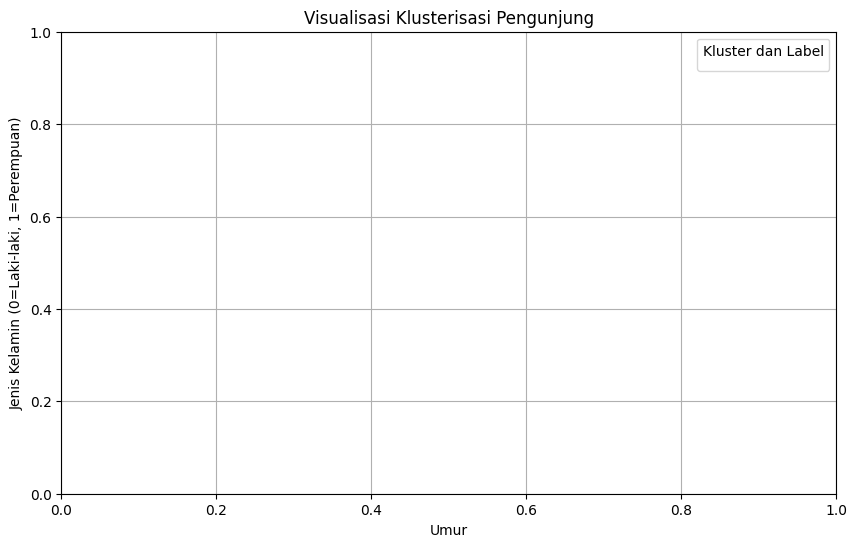

Klusterisasi selesai, hasil telah diperbarui di database, dan visualisasi ditampilkan.


In [17]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Koneksi ke database
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",  # Tidak ada password
    database="ulasan"
)

# Mengambil data dari tabel
query = "SELECT id, umur, jenis_kelamin, label FROM data_ulasan"
data = pd.read_sql(query, db)

# Pra-pemrosesan data
data['jenis_kelamin'] = data['jenis_kelamin'].map({'L': 0, 'P': 1})  # Laki-laki: 0, Perempuan: 1
data['label'] = data['label'].map({'positif': 1, 'negatif': 0})

# Menyiapkan fitur untuk klusterisasi
features = data[['umur', 'jenis_kelamin', 'label']].fillna(0)  # Menangani nilai NaN

# Melakukan normalisasi
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Klusterisasi menggunakan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Ubah jumlah kluster sesuai kebutuhan
data['kluster'] = kmeans.fit_predict(features_scaled)

# Menyimpan hasil kluster kembali ke database
update_query = "UPDATE data_ulasan SET kluster = %s WHERE id = %s"
cursor = db.cursor()

for index, row in data.iterrows():
    cursor.execute(update_query, (row['kluster'], row['id']))

# Commit perubahan
db.commit()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='umur', y='jenis_kelamin', hue=data['kluster'], palette='Set1', style=data['label'], markers=["o", "s"], alpha=0.7)

plt.title('Visualisasi Klusterisasi Pengunjung')
plt.xlabel('Umur')
plt.ylabel('Jenis Kelamin (0=Laki-laki, 1=Perempuan)')
plt.legend(title='Kluster dan Label', loc='upper right')
plt.grid()
plt.show()

# Menutup koneksi database
cursor.close()
db.close()

print("Klusterisasi selesai, hasil telah diperbarui di database, dan visualisasi ditampilkan.")


In [13]:
pip install sqlalchemy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\user\AppData\Local\Temp\ipykernel_46344\1515030780.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, db)


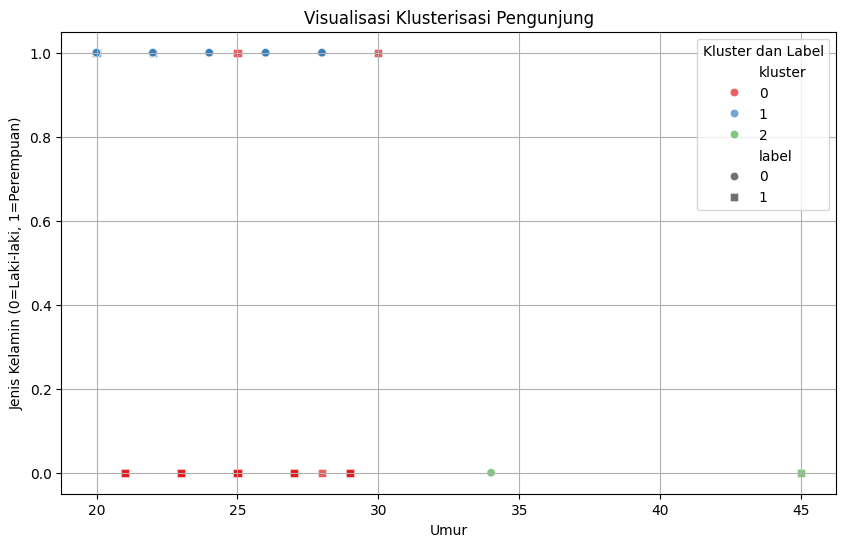

Klusterisasi selesai, hasil telah diperbarui di database, dan visualisasi ditampilkan.


In [26]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Koneksi ke database
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",  # Tidak ada password
    database="ulasan"
)

# Mengambil data dari tabel
query = "SELECT id, umur, jenis_kelamin, label FROM data_ulasan"
data = pd.read_sql(query, db)

# Pra-pemrosesan data
data['jenis_kelamin'] = data['jenis_kelamin'].map({'L': 0, 'P': 1})  # Laki-laki: 0, Perempuan: 1
data['label'] = data['label'].map({'Positif': 1, 'Negatif': 0})

# Menyiapkan fitur untuk klusterisasi
features = data[['umur', 'jenis_kelamin', 'label']].fillna(0)  # Menangani nilai NaN

# Melakukan normalisasi
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Klusterisasi menggunakan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Ubah jumlah kluster sesuai kebutuhan
data['kluster'] = kmeans.fit_predict(features_scaled)

# Menyimpan hasil kluster kembali ke database
update_query = "UPDATE data_ulasan SET kluster = %s WHERE id = %s"
cursor = db.cursor()

for index, row in data.iterrows():
    # Pastikan tipe data yang dikirim ke database adalah int
    cursor.execute(update_query, (int(row['kluster']), int(row['id'])))

# Commit perubahan
db.commit()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='umur', y='jenis_kelamin', hue='kluster', palette='Set1', style='label', markers=["o", "s"], alpha=0.7)

plt.title('Visualisasi Klusterisasi Pengunjung')
plt.xlabel('Umur')
plt.ylabel('Jenis Kelamin (0=Laki-laki, 1=Perempuan)')
plt.legend(title='Kluster dan Label', loc='upper right')
plt.grid()
plt.show()

# Menutup koneksi database
cursor.close()
db.close()

print("Klusterisasi selesai, hasil telah diperbarui di database, dan visualisasi ditampilkan.")


In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

def visualize_and_debug(data, filename='klusterisasi_plot.png'):
    print("Data shape:", data.shape)
    print("\nData head:")
    print(data.head())
    
    print("\nData info:")
    print(data.info())
    
    print("\nData description:")
    print(data.describe())
    
    print("\nCluster distribution:")
    print(data['kluster'].value_counts())
    
    print("\nChecking for NaN values:")
    print(data.isna().sum())
    
    # Visualisasi
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(data=data, x='umur', y='jenis_kelamin', hue='kluster', 
                              palette='Set1', style='label', markers=["o", "s"], alpha=0.7)
    plt.title('Visualisasi Klusterisasi Pengunjung')
    plt.xlabel('Umur')
    plt.ylabel('Jenis Kelamin (0=Laki-laki, 1=Perempuan)')
    plt.legend(title='Kluster dan Label', loc='upper right')
    plt.grid()
    
    # Menambahkan teks untuk setiap titik
    for line in range(0,data.shape[0]):
        scatter.text(data.umur[line], data.jenis_kelamin[line], data.id[line], 
                     horizontalalignment='left', size='small', color='black', weight='semibold')
    
    plt.tight_layout()
    plt.savefig(filename)
    print(f"\nPlot saved as '{filename}'")
    plt.close()

def main():
    # Koneksi ke database
    try:
        db = mysql.connector.connect(
            host="localhost",
            user="root",
            password="",  # Tidak ada password
            database="ulasan"
        )
    except mysql.connector.Error as err:
        print(f"Error: Tidak dapat terhubung ke database: {err}")
        return

    # Mengambil data dari tabel
    query = "SELECT id, umur, jenis_kelamin, label FROM data_ulasan"
    try:
        data = pd.read_sql(query, db)
    except pd.io.sql.DatabaseError as err:
        print(f"Error: Tidak dapat mengambil data dari database: {err}")
        db.close()
        return

    # Pra-pemrosesan data
    data['jenis_kelamin'] = data['jenis_kelamin'].map({'L': 0, 'P': 1})
    data['label'] = data['label'].map({'Positif': 1, 'Negatif': 0})

    # Menyiapkan fitur untuk klusterisasi
    features = data[['umur', 'jenis_kelamin', 'label']].fillna(0)

    # Melakukan normalisasi
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Klusterisasi menggunakan K-Means
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    data['kluster'] = kmeans.fit_predict(features_scaled)

    # Visualisasi dan debugging sebelum update database
    visualize_and_debug(data, 'klusterisasi_plot_before_update.png')

    # Menyimpan hasil kluster kembali ke database
    update_query = "UPDATE data_ulasan SET kluster = %s WHERE id = %s"
    cursor = db.cursor()
    try:
        for index, row in data.iterrows():
            cursor.execute(update_query, (int(row['kluster']), row['id']))
        db.commit()
    except mysql.connector.Error as err:
        print(f"Error: Tidak dapat memperbarui data di database: {err}")
        db.rollback()
    finally:
        cursor.close()
        db.close()

    print("Klusterisasi selesai, hasil telah diperbarui di database, dan visualisasi ditampilkan.")

    # Visualisasi final
    visualize_and_debug(data, 'klusterisasi_plot_final.png')

if __name__ == "__main__":
    main()

Error: Tidak dapat terhubung ke database: 2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)


C:\Users\user\AppData\Local\Temp\ipykernel_47216\3904357454.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, db)


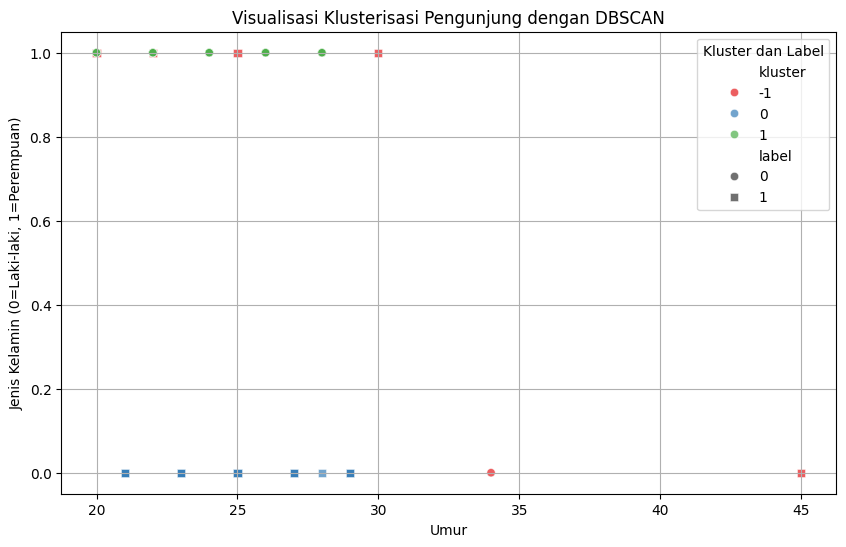

Klusterisasi selesai, hasil telah diperbarui di database, dan visualisasi ditampilkan.


In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Koneksi ke database
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",  # Tidak ada password
    database="ulasan"
)

# Mengambil data dari tabel
query = "SELECT id, umur, jenis_kelamin, label FROM data_ulasan"
data = pd.read_sql(query, db)

# Pra-pemrosesan data
data['jenis_kelamin'] = data['jenis_kelamin'].map({'L': 0, 'P': 1})  # Laki-laki: 0, Perempuan: 1
data['label'] = data['label'].map({'Positif': 1, 'Negatif': 0})

# Menyiapkan fitur untuk klusterisasi
features = data[['umur', 'jenis_kelamin', 'label']].fillna(0)  # Menangani nilai NaN

# Melakukan normalisasi
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Klusterisasi menggunakan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps dan min_samples dapat disesuaikan
data['kluster'] = dbscan.fit_predict(features_scaled)

# Menyimpan hasil kluster kembali ke database
update_query = "UPDATE data_ulasan SET kluster = %s WHERE id = %s"
cursor = db.cursor()

for index, row in data.iterrows():
    # DBSCAN memberi -1 untuk noise, pastikan itu ditangani dengan baik
    cursor.execute(update_query, (int(row['kluster']), int(row['id'])))

# Commit perubahan
db.commit()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='umur', y='jenis_kelamin', hue='kluster', palette='Set1', style='label', markers=["o", "s"], alpha=0.7)

plt.title('Visualisasi Klusterisasi Pengunjung dengan DBSCAN')
plt.xlabel('Umur')
plt.ylabel('Jenis Kelamin (0=Laki-laki, 1=Perempuan)')
plt.legend(title='Kluster dan Label', loc='upper right')
plt.grid()
plt.show()

# Menutup koneksi database
cursor.close()
db.close()

print("Klusterisasi selesai, hasil telah diperbarui di database, dan visualisasi ditampilkan.")


C:\Users\Khalied Maturino\AppData\Local\Temp\ipykernel_20516\3626021034.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, db)


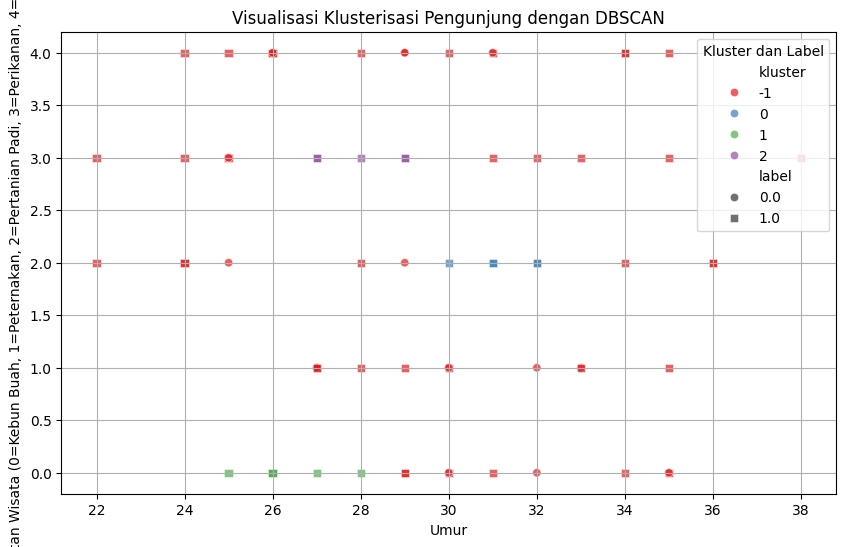

Klusterisasi selesai, hasil telah diperbarui di database, dan visualisasi ditampilkan.


In [6]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Koneksi ke database
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",  # Tidak ada password
    database="ulasan"
)

# Mengambil data dari tabel
query = "SELECT id, umur, jenis_kegiatan_wisata, label FROM data_ulasan"
data = pd.read_sql(query, db)

# Pra-pemrosesan data
# Pemetaan untuk jenis_kegiatan_wisata
data['jenis_kegiatan_wisata'] = data['jenis_kegiatan_wisata'].map({
    'Wisata Kebun Buah': 0,
    'Wisata Peternakan': 1,
    'Wisata Pertanian Padi': 2,
    'Wisata Perikanan': 3,
    'Wisata Agro Edukasi': 4
})

data['label'] = data['label'].map({'Positif': 1, 'Negatif': 0})

# Menyiapkan fitur untuk klusterisasi
features = data[['umur', 'jenis_kegiatan_wisata', 'label']].fillna(0)  # Menangani nilai NaN

# Melakukan normalisasi
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Klusterisasi menggunakan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps dan min_samples dapat disesuaikan
data['kluster'] = dbscan.fit_predict(features_scaled)

# Menyimpan hasil kluster kembali ke database
update_query = "UPDATE data_ulasan SET kluster = %s WHERE id = %s"
cursor = db.cursor()

for index, row in data.iterrows():
    # DBSCAN memberi -1 untuk noise, pastikan itu ditangani dengan baik
    cursor.execute(update_query, (int(row['kluster']), int(row['id'])))

# Commit perubahan
db.commit()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='umur', y='jenis_kegiatan_wisata', hue='kluster', palette='Set1', style='label', markers=["o", "s"], alpha=0.7)

plt.title('Visualisasi Klusterisasi Pengunjung dengan DBSCAN')
plt.xlabel('Umur')
plt.ylabel('Jenis Kegiatan Wisata (0=Kebun Buah, 1=Peternakan, 2=Pertanian Padi, 3=Perikanan, 4=Agro Edukasi)')
plt.legend(title='Kluster dan Label', loc='upper right')
plt.grid()
plt.show()

# Menutup koneksi database
cursor.close()
db.close()

print("Klusterisasi selesai, hasil telah diperbarui di database, dan visualisasi ditampilkan.")


Kolom fitur untuk klusterisasi:
Index(['umur', 'label', 'kegiatan_Wisata Agro Edukasi',
       'kegiatan_Wisata Kebun Buah', 'kegiatan_Wisata Perikanan',
       'kegiatan_Wisata Pertanian Padi', 'kegiatan_Wisata Peternakan'],
      dtype='object')
Nilai unik untuk jenis_kegiatan_wisata:
['Wisata Kebun Buah' 'Wisata Peternakan' 'Wisata Pertanian Padi'
 'Wisata Perikanan' 'Wisata Agro Edukasi']


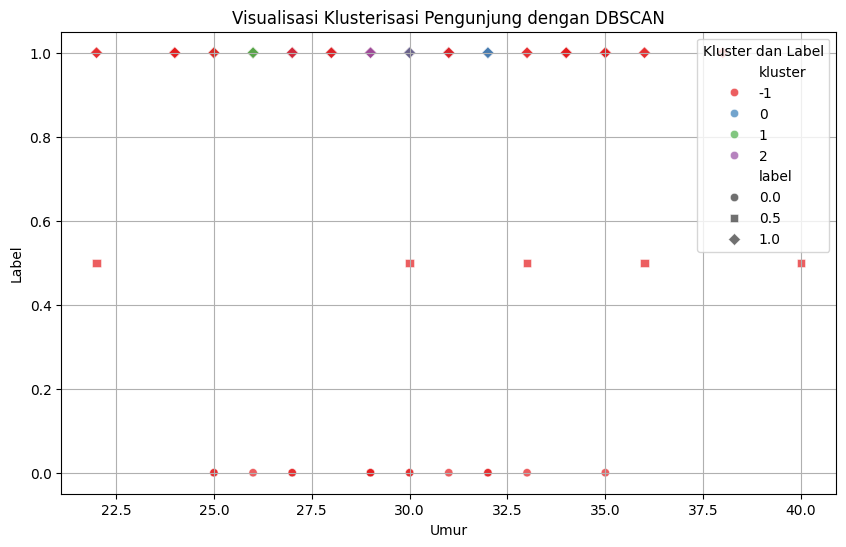

Klusterisasi selesai, hasil telah diperbarui di database, dan visualisasi ditampilkan.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sqlalchemy import create_engine, text

# Koneksi ke database menggunakan SQLAlchemy
engine = create_engine('mysql+mysqlconnector://root:@localhost/ulasan')

# Mengambil data dari tabel
query = "SELECT id, umur, jenis_kegiatan_wisata, label FROM data_ulasan"
data = pd.read_sql(query, engine)

# Pra-pemrosesan data
# Pemetaan label
data['label'] = data['label'].map({'Positif': 1, 'Negatif': 0, 'Netral': 0.5})

# Menyiapkan fitur untuk klusterisasi
# Menggunakan dummies untuk jenis_kegiatan_wisata
kegiatan_dummies = pd.get_dummies(data['jenis_kegiatan_wisata'], prefix='kegiatan')

# Gabungkan fitur umur, label, dan jenis_kegiatan_wisata
features = pd.concat([data[['umur', 'label']], kegiatan_dummies], axis=1).fillna(0)  # Menangani nilai NaN

# Tampilkan kolom fitur untuk memastikan semuanya ada
print("Kolom fitur untuk klusterisasi:")
print(features.columns)

# Melakukan normalisasi
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Klusterisasi menggunakan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps dan min_samples dapat disesuaikan
data['kluster'] = dbscan.fit_predict(features_scaled)

# Menyimpan hasil kluster kembali ke database
update_query = text("UPDATE data_ulasan SET kluster = :kluster WHERE id = :id")  # Menggunakan parameter dengan nama dan text
with engine.connect() as conn:
    for index, row in data.iterrows():
        # DBSCAN memberi -1 untuk noise, pastikan itu ditangani dengan baik
        conn.execute(update_query, {'kluster': int(row['kluster']), 'id': int(row['id'])})

# Periksa nilai unik untuk jenis_kegiatan_wisata
print("Nilai unik untuk jenis_kegiatan_wisata:")
print(data['jenis_kegiatan_wisata'].unique())

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='umur', y='label', hue='kluster', palette='Set1', style='label', markers=["o", "s", "D"], alpha=0.7)

plt.title('Visualisasi Klusterisasi Pengunjung dengan DBSCAN')
plt.xlabel('Umur')
plt.ylabel('Label')
plt.legend(title='Kluster dan Label', loc='upper right')
plt.grid()
plt.show()

print("Klusterisasi selesai, hasil telah diperbarui di database, dan visualisasi ditampilkan.")
